# Data Visualizations

### CA1 - 2023

### Ayllin Bukovic - 2023003

This project aims to analize a dataset based on board games from a retail company. This analysis will help determine the sales strategy for the company in their upcoming Winter season.   
First we import the necesary libraries:

In [1]:
import pandas as pd
import statistics as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt


import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects

import warnings
warnings.filterwarnings('ignore')

### Part 1

In [2]:
df = pd.read_csv('board_games.csv')
df.head(5)

,game_id,description,image,max_players,max_playtime,min_age,min_players,min_playtime,name,playing_time,...,artist,category,compilation,designer,expansion,family,mechanic,publisher,average_rating,users_rated
0,1,Die Macher is a game about seven sequential po...,//cf.geekdo-images.com/images/pic159509.jpg,5,240,14,3,240,Die Macher,240,...,Marcus Gschwendtner,"Economic,Negotiation,Political",NaN,Karl-Heinz Schmiel,NaN,"Country: Germany,Valley Games Classic Line","Area Control / Area Influence,Auction/Bidding,...","Hans im Glück Verlags-GmbH,Moskito Spiele,Vall...",7.66508,4498
1,2,Dragonmaster is a trick-taking card game based...,//cf.geekdo-images.com/images/pic184174.jpg,4,30,12,3,30,Dragonmaster,30,...,Bob Pepper,"Card Game,Fantasy",NaN,"G. W. ""Jerry"" D'Arcey",NaN,Animals: Dragons,Trick-taking,"E.S. Lowe,Milton Bradley",6.60815,478
2,3,"Part of the Knizia tile-laying trilogy, Samura...",//cf.geekdo-images.com/images/pic3211873.jpg,4,60,10,2,30,Samurai,60,...,Franz Vohwinkel,"Abstract Strategy,Medieval",NaN,Reiner Knizia,NaN,"Asian Theme,Country: Japan,Knizia tile-laying ...","Area Control / Area Influence,Hand Management,...","999 Games,ABACUSSPIELE,Astrel Games,Ceilikan J...",7.44119,12019
3,4,When you see the triangular box and the luxuri...,//cf.geekdo-images.com/images/pic285299.jpg,4,60,12,2,60,Tal der Könige,60,...,NaN,Ancient,NaN,Christian Beierer,NaN,"Country: Egypt,Promotional Board Games","Action Point Allowance System,Area Control / A...",KOSMOS,6.60675,314
4,5,"In Acquire, each player strategically invests ...",//cf.geekdo-images.com/images/pic342163.jpg,6,90,12,3,90,Acquire,90,...,"Scott Okumura,Peter Whitley",Economic,NaN,Sid Sackson,NaN,3M Bookshelf Series,"Hand Management,Stock Holding,Tile Placement","3M,Avalon Hill,Avalon Hill (Hasbro),Dujardin,G...",7.35830,15195


In [3]:
df.shape

(10532, 22)

In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10532 entries, 0 to 10531
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   game_id         10532 non-null  int64  
 1   description     10532 non-null  object 
 2   image           10531 non-null  object 
 3   max_players     10532 non-null  int64  
 4   max_playtime    10532 non-null  int64  
 5   min_age         10532 non-null  int64  
 6   min_players     10532 non-null  int64  
 7   min_playtime    10532 non-null  int64  
 8   name            10532 non-null  object 
 9   playing_time    10532 non-null  int64  
 10  thumbnail       10531 non-null  object 
 11  year_published  10532 non-null  int64  
 12  artist          7759 non-null   object 
 13  category        10438 non-null  object 
 14  compilation     410 non-null    object 
 15  designer        10406 non-null  object 
 16  expansion       2752 non-null   object 
 17  family          7724 non-null  

In [5]:
df_games=df.drop(columns=["game_id","description","image","thumbnail","artist","compilation",
                    "designer","expansion","family","publisher"])

In [6]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10532 entries, 0 to 10531
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   max_players     10532 non-null  int64  
 1   max_playtime    10532 non-null  int64  
 2   min_age         10532 non-null  int64  
 3   min_players     10532 non-null  int64  
 4   min_playtime    10532 non-null  int64  
 5   name            10532 non-null  object 
 6   playing_time    10532 non-null  int64  
 7   year_published  10532 non-null  int64  
 8   category        10438 non-null  object 
 9   mechanic        9582 non-null   object 
 10  average_rating  10532 non-null  float64
 11  users_rated     10532 non-null  int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 987.5+ KB


In [7]:
df_games.isna().sum()

max_players         0
max_playtime        0
min_age             0
min_players         0
min_playtime        0
name                0
playing_time        0
year_published      0
category           94
mechanic          950
average_rating      0
users_rated         0
dtype: int64

In [8]:
df_games.duplicated().sum()

0

In [9]:
df_games["category"].fillna(value="No Category", inplace=True)


In [10]:
df_games["mechanic"].fillna(value="No Mechanic", inplace=True)

In [11]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10532 entries, 0 to 10531
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   max_players     10532 non-null  int64  
 1   max_playtime    10532 non-null  int64  
 2   min_age         10532 non-null  int64  
 3   min_players     10532 non-null  int64  
 4   min_playtime    10532 non-null  int64  
 5   name            10532 non-null  object 
 6   playing_time    10532 non-null  int64  
 7   year_published  10532 non-null  int64  
 8   category        10532 non-null  object 
 9   mechanic        10532 non-null  object 
 10  average_rating  10532 non-null  float64
 11  users_rated     10532 non-null  int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 987.5+ KB


In [12]:
order_columns = ['name', 'average_rating', 'category', 'max_playtime','min_playtime','playing_time','min_age', 
             'min_players','max_players','mechanic', 'users_rated','year_published']
df_games=df_games[order_columns]
df_games

,name,average_rating,category,max_playtime,min_playtime,playing_time,min_age,min_players,max_players,mechanic,users_rated,year_published
0,Die Macher,7.66508,"Economic,Negotiation,Political",240,240,240,14,3,5,"Area Control / Area Influence,Auction/Bidding,...",4498,1986
1,Dragonmaster,6.60815,"Card Game,Fantasy",30,30,30,12,3,4,Trick-taking,478,1981
2,Samurai,7.44119,"Abstract Strategy,Medieval",60,30,60,10,2,4,"Area Control / Area Influence,Hand Management,...",12019,1998
3,Tal der Könige,6.60675,Ancient,60,60,60,12,2,4,"Action Point Allowance System,Area Control / A...",314,1992
4,Acquire,7.35830,Economic,90,90,90,12,3,6,"Hand Management,Stock Holding,Tile Placement",15195,1964
...,...,...,...,...,...,...,...,...,...,...,...,...
10527,"Silver Bayonet: The First Team in Vietnam, 196...",8.35333,"Vietnam War,Wargame",480,30,480,12,1,2,Hex-and-Counter,75,2016
10528,Codex: Card-Time Strategy – Core Set,8.08780,"Card Game,Fantasy,Fighting,Video Game Theme",45,45,45,13,2,5,"Deck / Pool Building,Hand Management,Variable ...",82,2016
10529,Wind the Film!,7.28016,Card Game,20,20,20,12,2,4,"Hand Management,Set Collection",63,2016
10530,Robo Rally (2016),7.45871,"Miniatures,Racing,Science Fiction",120,20,120,12,2,6,"Action / Movement Programming,Grid Movement,Mo...",341,2016


''

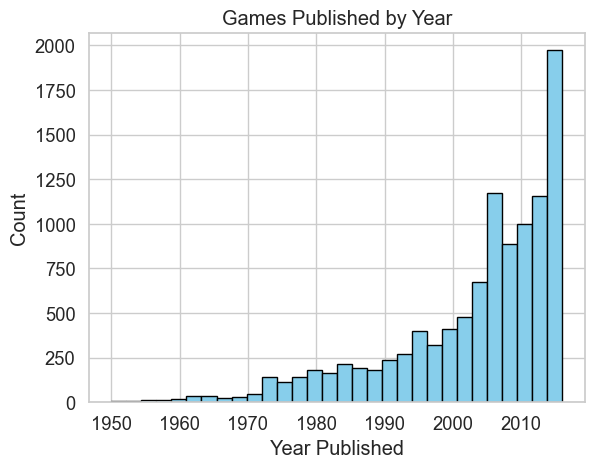

In [40]:
plt.hist(df_games['year_published'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel("Year Published")
plt.ylabel("Count")
plt.title("Games Published by Year")
;

''

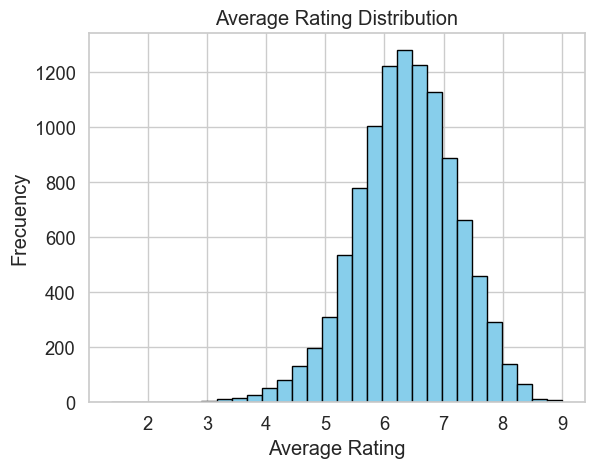

In [48]:
plt.hist(df_games['average_rating'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel("Average Rating")
plt.ylabel("Frecuency")
plt.title("Average Rating Distribution")
;

''

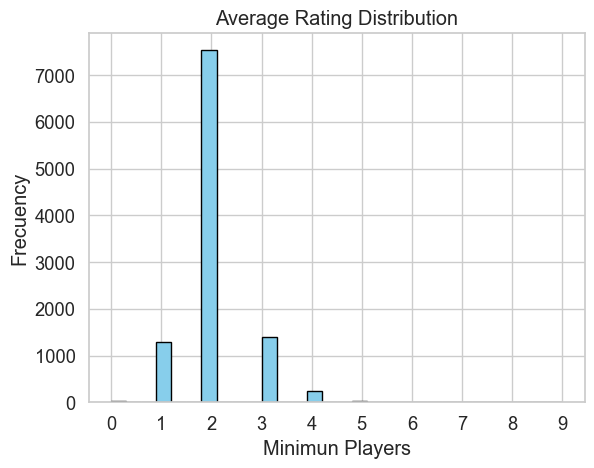

In [52]:
plt.hist(df_games['min_players'], bins=30, color='skyblue', edgecolor='black')
plt.xticks(range(0, max(df_games['min_players']) + 1))

plt.xlabel("Minimun Players")
plt.ylabel("Frecuency")
plt.title("Average Rating Distribution")
;

#### 1. What are the top 5 “average rated” games?  

In [15]:
top5=df_games.sort_values(by="average_rating", ascending=False)
top_5=top5.head(5)
top_5

,name,average_rating,category,max_playtime,min_playtime,playing_time,min_age,min_players,max_players,mechanic,users_rated,year_published
8348,Small World Designer Edition,9.00392,"Civilization,Fantasy,Territory Building",80,40,80,8,2,6,"Area Control / Area Influence,Area Movement,Di...",180,2015
6392,Kingdom Death: Monster,8.93184,"Adventure,Fantasy,Horror,Mature / Adult,Miniat...",180,60,180,17,1,6,"Co-operative Play,Dice Rolling,Grid Movement,R...",1954,2015
9964,Terra Mystica: Big Box,8.84862,"Civilization,Economic,Fantasy,Territory Building",150,60,150,12,2,5,"Route/Network Building,Variable Player Powers",109,2015
8526,Last Chance for Victory,8.84603,"American Civil War,Civil War,Wargame",60,60,60,15,2,2,"Dice Rolling,Hex-and-Counter",88,2014
9675,"The Greatest Day: Sword, Juno, and Gold Beaches",8.83081,"Wargame,World War II",6000,60,6000,12,2,8,Chit-Pull System,86,2015


<Figure size 500x500 with 0 Axes>

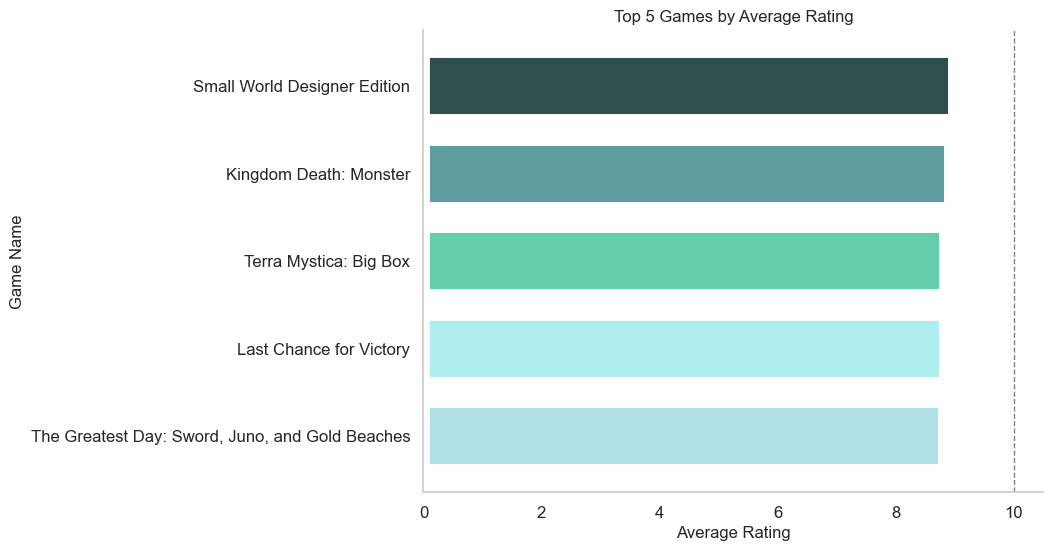

In [83]:
plt.figure(figsize=(5,5))

top_5 = top_5.sort_values(by = "average_rating", ascending = True)

fig = plt.figure(figsize=(8,6),edgecolor="black")
ax = plt.subplot()

plt.barh(top_5["name"],top_5["average_rating"],color=["powderblue","paleturquoise","mediumaquamarine","cadetblue","darkslategray"],linewidth=10)

ax.spines["top"].set(visible = False)
ax.spines["right"].set(visible = False)

plt.grid(visible=None)
plt.axvline(x=10, color='gray', linestyle='--', linewidth=1, label='Rating 10')


plt.xlabel("Average Rating",fontsize=12)
plt.ylabel("Game Name", fontsize=12)
plt.title("Top 5 Games by Average Rating",fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12);

#### 2. Is there a correlation between the “users_rated” and the “max_playtime”?  

In [17]:
df_games[["users_rated","max_playtime"]].corr()

,users_rated,max_playtime
users_rated,1.000000,-0.004342
max_playtime,-0.004342,1.000000


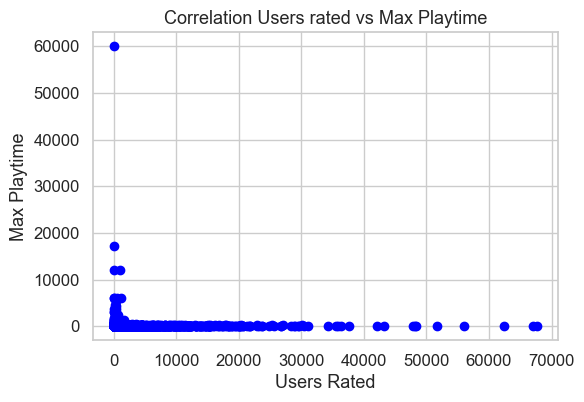

In [101]:
plt.figure(figsize=(6,4))
plt.plot("users_rated","max_playtime", data=df_games, color="blue", linestyle="none", marker="o", markeredgecolor="blue")

plt.title("Correlation Users rated vs Max Playtime",fontsize=13)
plt.xlabel("Users Rated",fontsize=13)
plt.ylabel("Max Playtime",fontsize=13);

plt.yticks(fontsize=12)
plt.xticks(fontsize=12);

The tread is not clear at all, so we can say that both variables are not correlated

#### 3. What is the distribution of game categories? (You may not use a barchart)

In [19]:
df_games['category'] = df_games['category'].apply(lambda x: " ".join(x.lower() for x in 
x.split())) 
df_games['category'].head(10) 

0    economic,negotiation,political
1                 card game,fantasy
2        abstract strategy,medieval
3                           ancient
4                          economic
5             civilization,nautical
6                 abstract strategy
7              civilization,fantasy
8                       exploration
9                    fantasy,travel
Name: category, dtype: object

In [20]:
category=df_games["category"].unique()
category

array(['economic,negotiation,political', 'card game,fantasy',
       'abstract strategy,medieval', ..., 'bluffing,deduction,dice',
       'fantasy,fighting,miniatures,sports',
       'bluffing,horror,maze,movies / tv / radio theme,science fiction'],
      dtype=object)

In [21]:
category_list = list(category)
category_list

['economic,negotiation,political',
 'card game,fantasy',
 'abstract strategy,medieval',
 'ancient',
 'economic',
 'civilization,nautical',
 'abstract strategy',
 'civilization,fantasy',
 'exploration',
 'fantasy,travel',
 'card game,farming,negotiation',
 'ancient,mythology',
 'negotiation',
 'bluffing,negotiation,science fiction',
 'collectible components,dice,fighting,print & play',
 'miniatures,racing,science fiction',
 'american west,bluffing,city building',
 'science fiction',
 'adventure,exploration,fantasy',
 'fantasy,political,wargame',
 'civilization,negotiation,political,science fiction,space exploration,wargame',
 'exploration,fantasy,wargame',
 'civilization,economic,medieval,renaissance',
 'economic,political,wargame',
 'card game,humor,negotiation,political',
 'fighting,humor',
 'adventure,electronic,exploration,fantasy,fighting',
 'adventure,exploration,fantasy,fighting,miniatures',
 'abstract strategy,american west',
 'adventure,horror,novel-based',
 'science fiction,wa

In [22]:
df_category = pd.DataFrame({"category": category_list})
df_category.head(50)

,category
0,"economic,negotiation,political"
1,"card game,fantasy"
2,"abstract strategy,medieval"
3,ancient
4,economic
5,"civilization,nautical"
6,abstract strategy
7,"civilization,fantasy"
8,exploration
9,"fantasy,travel"


In [23]:
df_category.duplicated().sum()

0

In [24]:

df_category_split=df_games["category"].str.split(",",expand=True)
df_category_split

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,economic,negotiation,political,None,None,None,None,None,None,None,None,None,None,None
1,card game,fantasy,None,None,None,None,None,None,None,None,None,None,None,None
2,abstract strategy,medieval,None,None,None,None,None,None,None,None,None,None,None,None
3,ancient,None,None,None,None,None,None,None,None,None,None,None,None,None
4,economic,None,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10527,vietnam war,wargame,None,None,None,None,None,None,None,None,None,None,None,None
10528,card game,fantasy,fighting,video game theme,None,None,None,None,None,None,None,None,None,None
10529,card game,None,None,None,None,None,None,None,None,None,None,None,None,None
10530,miniatures,racing,science fiction,None,None,None,None,None,None,None,None,None,None,None


In [25]:
df_games_split = pd.concat([df_games, df_category_split], axis=1)
df_games_split

,name,average_rating,category,max_playtime,min_playtime,playing_time,min_age,min_players,max_players,mechanic,...,4,5,6,7,8,9,10,11,12,13
0,Die Macher,7.66508,"economic,negotiation,political",240,240,240,14,3,5,"Area Control / Area Influence,Auction/Bidding,...",...,None,None,None,None,None,None,None,None,None,None
1,Dragonmaster,6.60815,"card game,fantasy",30,30,30,12,3,4,Trick-taking,...,None,None,None,None,None,None,None,None,None,None
2,Samurai,7.44119,"abstract strategy,medieval",60,30,60,10,2,4,"Area Control / Area Influence,Hand Management,...",...,None,None,None,None,None,None,None,None,None,None
3,Tal der Könige,6.60675,ancient,60,60,60,12,2,4,"Action Point Allowance System,Area Control / A...",...,None,None,None,None,None,None,None,None,None,None
4,Acquire,7.35830,economic,90,90,90,12,3,6,"Hand Management,Stock Holding,Tile Placement",...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10527,"Silver Bayonet: The First Team in Vietnam, 196...",8.35333,"vietnam war,wargame",480,30,480,12,1,2,Hex-and-Counter,...,None,None,None,None,None,None,None,None,None,None
10528,Codex: Card-Time Strategy – Core Set,8.08780,"card game,fantasy,fighting,video game theme",45,45,45,13,2,5,"Deck / Pool Building,Hand Management,Variable ...",...,None,None,None,None,None,None,None,None,None,None
10529,Wind the Film!,7.28016,card game,20,20,20,12,2,4,"Hand Management,Set Collection",...,None,None,None,None,None,None,None,None,None,None
10530,Robo Rally (2016),7.45871,"miniatures,racing,science fiction",120,20,120,12,2,6,"Action / Movement Programming,Grid Movement,Mo...",...,None,None,None,None,None,None,None,None,None,None


In [26]:
pd.reset_option('display.max_columns')
pd.reset_option('display.precision')

pd.set_option('display.max_columns',50)
pd.set_option('display.precision',1)


In [27]:
df_games_split

,name,average_rating,category,max_playtime,min_playtime,playing_time,min_age,min_players,max_players,mechanic,users_rated,year_published,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Die Macher,7.7,"economic,negotiation,political",240,240,240,14,3,5,"Area Control / Area Influence,Auction/Bidding,...",4498,1986,economic,negotiation,political,None,None,None,None,None,None,None,None,None,None,None
1,Dragonmaster,6.6,"card game,fantasy",30,30,30,12,3,4,Trick-taking,478,1981,card game,fantasy,None,None,None,None,None,None,None,None,None,None,None,None
2,Samurai,7.4,"abstract strategy,medieval",60,30,60,10,2,4,"Area Control / Area Influence,Hand Management,...",12019,1998,abstract strategy,medieval,None,None,None,None,None,None,None,None,None,None,None,None
3,Tal der Könige,6.6,ancient,60,60,60,12,2,4,"Action Point Allowance System,Area Control / A...",314,1992,ancient,None,None,None,None,None,None,None,None,None,None,None,None,None
4,Acquire,7.4,economic,90,90,90,12,3,6,"Hand Management,Stock Holding,Tile Placement",15195,1964,economic,None,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10527,"Silver Bayonet: The First Team in Vietnam, 196...",8.4,"vietnam war,wargame",480,30,480,12,1,2,Hex-and-Counter,75,2016,vietnam war,wargame,None,None,None,None,None,None,None,None,None,None,None,None
10528,Codex: Card-Time Strategy – Core Set,8.1,"card game,fantasy,fighting,video game theme",45,45,45,13,2,5,"Deck / Pool Building,Hand Management,Variable ...",82,2016,card game,fantasy,fighting,video game theme,None,None,None,None,None,None,None,None,None,None
10529,Wind the Film!,7.3,card game,20,20,20,12,2,4,"Hand Management,Set Collection",63,2016,card game,None,None,None,None,None,None,None,None,None,None,None,None,None
10530,Robo Rally (2016),7.5,"miniatures,racing,science fiction",120,20,120,12,2,6,"Action / Movement Programming,Grid Movement,Mo...",341,2016,miniatures,racing,science fiction,None,None,None,None,None,None,None,None,None,None,None


In [28]:
df_games_split.rename(columns={0: 'c1', 1: 'c2',2: 'c3', 3: 'c4',4: 'c5', 5: 'c6',6: 'c7', 7: 'c8',8: 'c9',
                         9: 'c10',10: 'c11', 11: 'c12',12: 'c13', 13: 'c14'}, inplace=True)

In [29]:
df_games_split["c1"].unique()

array(['economic', 'card game', 'abstract strategy', 'ancient',
       'civilization', 'exploration', 'fantasy', 'negotiation',
       'bluffing', 'collectible components', 'miniatures',
       'american west', 'science fiction', 'adventure', 'fighting',
       'deduction', 'dice', 'aviation / flight', 'renaissance',
       'city building', 'medieval', 'trivia', 'political', 'wargame',
       'american civil war', 'age of reason', 'animals', 'nautical',
       'territory building', 'prehistoric', 'electronic',
       'action / dexterity', 'educational', 'racing', 'print & play',
       'trains', 'party game', 'civil war', 'american indian wars',
       'napoleonic', 'humor', 'movies / tv / radio theme',
       'american revolutionary war', 'mafia', "children's game",
       'comic book / strip', 'no category', 'arabian', 'novel-based',
       'pirates', 'transportation', 'puzzle', 'music', 'horror',
       'post-napoleonic', 'sports', 'farming', 'murder/mystery',
       'word game', 'b

In [30]:
df_games_split["c2"].unique()

array(['negotiation', 'fantasy', 'medieval', None, 'nautical', 'travel',
       'farming', 'mythology', 'dice', 'racing', 'bluffing',
       'exploration', 'political', 'economic', 'humor', 'electronic',
       'american west', 'horror', 'wargame', 'word game', 'civilization',
       'ancient', 'maze', 'territory building', 'world war ii',
       'card game', 'movies / tv / radio theme', 'world war i', 'trains',
       "children's game", 'pirates', 'fighting', 'murder/mystery',
       'real-time', 'transportation', 'science fiction', 'puzzle',
       'party game', 'deduction', 'space exploration',
       'industry / manufacturing', 'game system', 'spies/secret agents',
       'medical', 'sports', 'mafia', 'zombies', 'city building', 'trivia',
       'napoleonic', 'age of reason', 'american indian wars',
       'renaissance', 'book', 'music', 'animals', 'action / dexterity',
       'novel-based', 'memory', 'collectible components',
       'modern warfare', 'miniatures', 'american revolu

In [31]:
data=df_games_split.values.tolist()

In [32]:
# Initialize an empty dictionary to store counts for each category
category_counts = {}

# Iterate through each row
for row in data:
    # Iterate through each column in the row
    for i in range(12,len(row)):
        category= row[i]
        # Count the occurrences of ,each category
        if category in category_counts:
            category_counts[category] += 1
        else:
            category_counts[category] = 1

# Print the category counts
for category, count in category_counts.items():
    print(f"{category}: {count}")

economic: 878
negotiation: 389
political: 297
None: 119934
card game: 2981
fantasy: 1218
abstract strategy: 710
medieval: 534
ancient: 422
civilization: 199
nautical: 355
exploration: 431
travel: 109
farming: 111
mythology: 166
bluffing: 655
science fiction: 850
collectible components: 237
dice: 838
fighting: 900
print & play: 212
miniatures: 443
racing: 402
american west: 131
city building: 310
adventure: 541
wargame: 2034
space exploration: 119
renaissance: 159
humor: 580
electronic: 116
horror: 347
novel-based: 253
deduction: 508
word game: 229
territory building: 264
aviation / flight: 166
maze: 101
puzzle: 194
real-time: 315
trivia: 265
industry / manufacturing: 157
party game: 833
world war ii: 676
american civil war: 131
age of reason: 83
movies / tv / radio theme: 486
world war i: 117
trains: 202
animals: 572
children's game: 704
pirates: 186
murder/mystery: 152
transportation: 230
prehistoric: 88
action / dexterity: 514
sports: 243
game system: 22
spies/secret agents: 95
educa

In [33]:
df_cat = pd.DataFrame(list(category_counts.items()), columns=['Category', 'Count'])
df_cat

,Category,Count
0,economic,878
1,negotiation,389
2,political,297
3,None,119934
4,card game,2981
...,...,...
80,video game theme,144
81,mature / adult,50
82,vietnam war,29
83,korean war,14


In [34]:
df_cat=df_cat.drop(3)

In [35]:
pd.reset_option('display.max_rows')
pd.reset_option('display.precision')

pd.set_option('display.max_rows',100)
pd.set_option('display.precision',1)

In [36]:
df_cat.head(100)

,Category,Count
0,economic,878
1,negotiation,389
2,political,297
4,card game,2981
5,fantasy,1218
6,abstract strategy,710
7,medieval,534
8,ancient,422
9,civilization,199
10,nautical,355


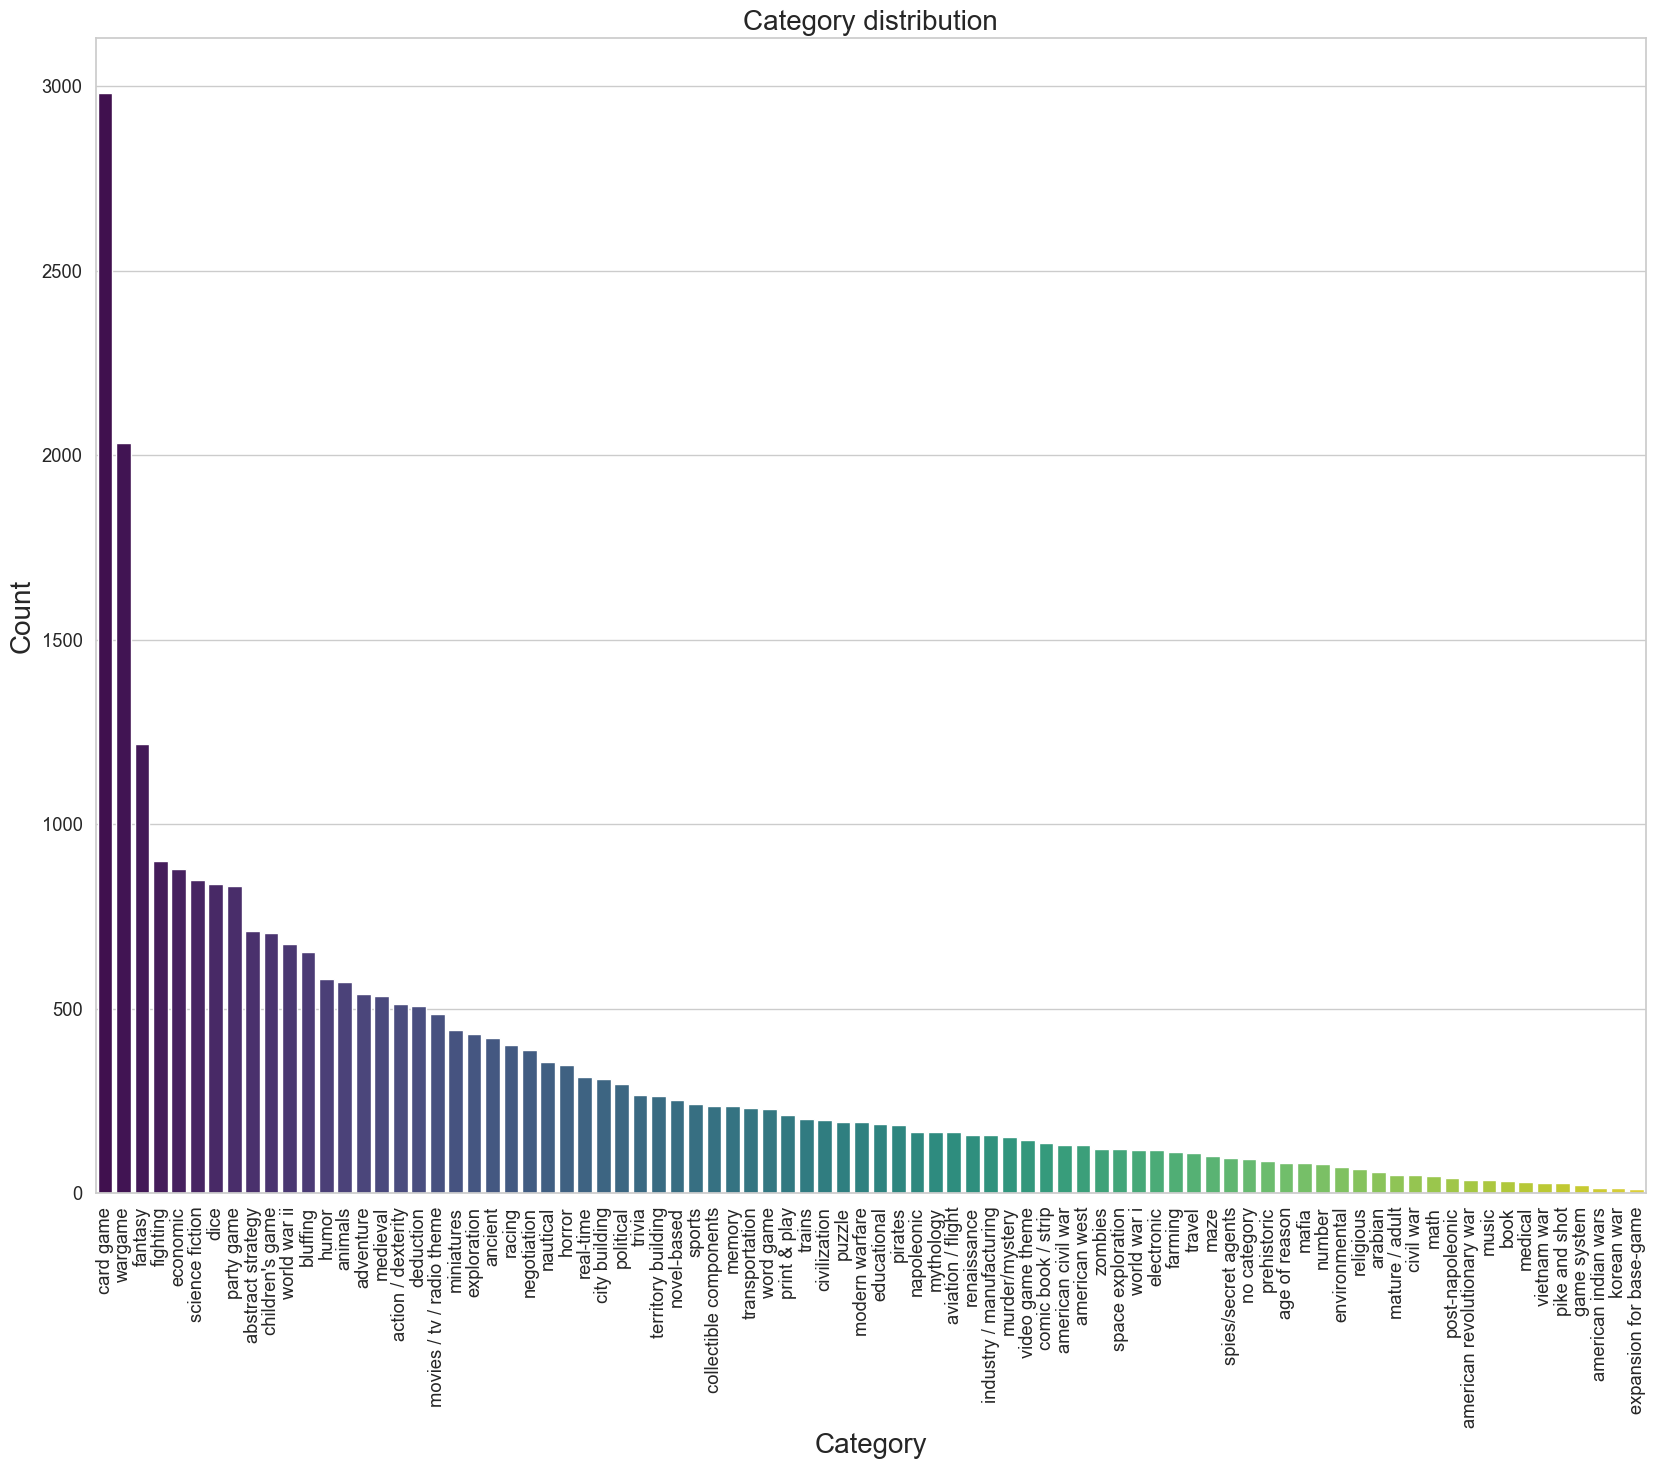

In [90]:
df_cat = df_cat.sort_values(by='Count', ascending=False)

sns.set(style="whitegrid", font_scale=1.2)

plt.figure(figsize=(20, 15))
sns.barplot(x='Category', y='Count', data=df_cat, palette='viridis')

plt.xlabel('Category',fontsize=20 )
plt.ylabel('Count',fontsize=20)
plt.title('Category distribution',fontsize=20)
plt.xticks(rotation=90) ;


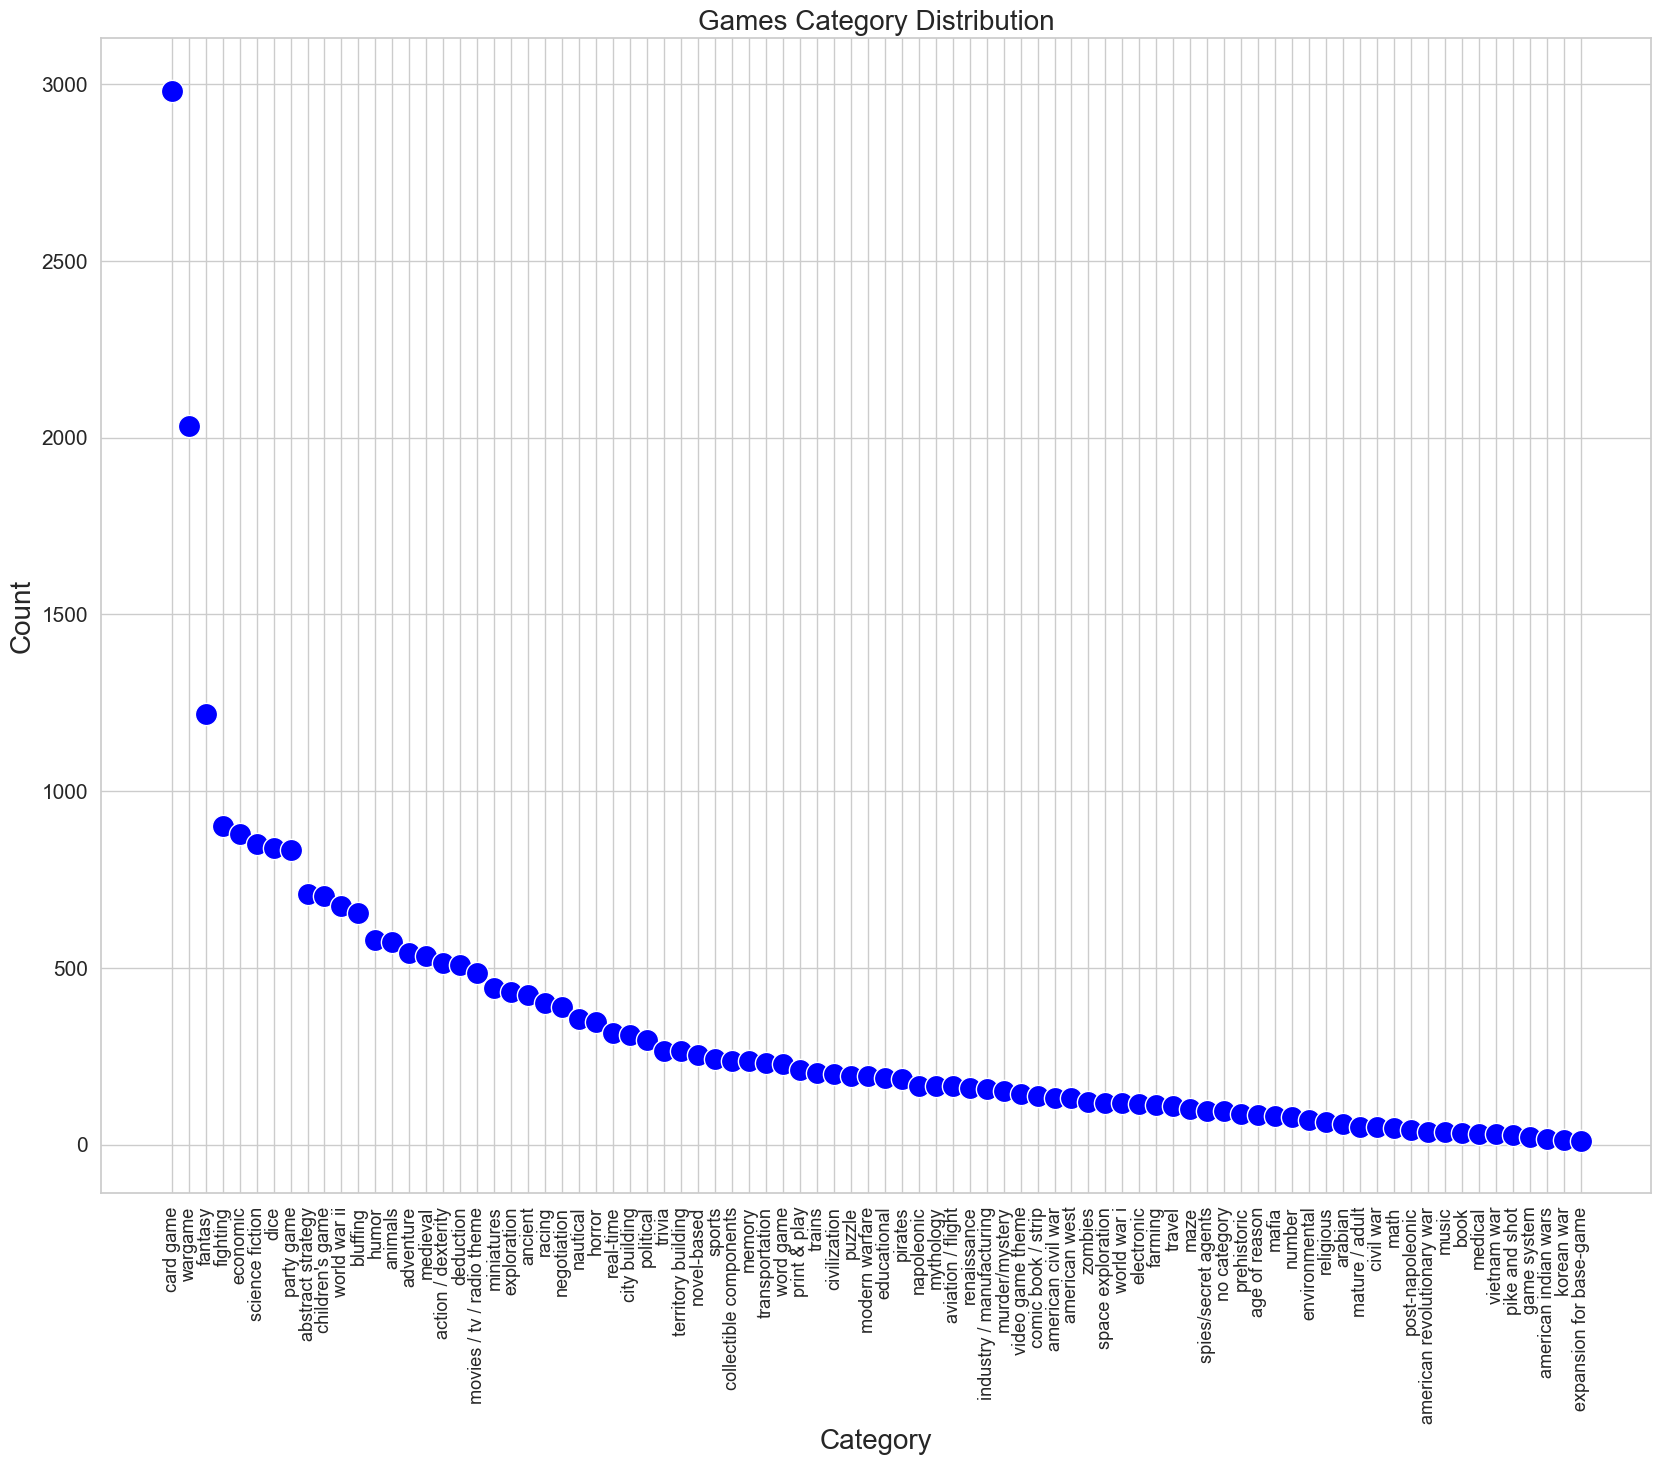

In [99]:
plt.figure(figsize=(20,15))
plt.plot("Category","Count", data=df_cat, color="blue", linestyle="none", marker="o", markeredgecolor="white",markersize=16)

plt.title("Games Category Distribution",fontsize=20)
plt.xlabel("Category",fontsize=20)
plt.ylabel("Count",fontsize=20);

plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xticks(rotation=90,fontsize=13);

#### 4. Do older games (1992 and earlier) have a higher MEDIAN “average rating” than newer games (after 1992)?  

In [102]:
df_games["period"] = pd.cut(df_games["year_published"], bins=[-float('inf'), 1992, float('inf')], labels=['Old', 'New'])
df_games


,name,average_rating,category,max_playtime,min_playtime,playing_time,min_age,min_players,max_players,mechanic,users_rated,year_published,period
0,Die Macher,7.7,"economic,negotiation,political",240,240,240,14,3,5,"Area Control / Area Influence,Auction/Bidding,...",4498,1986,Old
1,Dragonmaster,6.6,"card game,fantasy",30,30,30,12,3,4,Trick-taking,478,1981,Old
2,Samurai,7.4,"abstract strategy,medieval",60,30,60,10,2,4,"Area Control / Area Influence,Hand Management,...",12019,1998,New
3,Tal der Könige,6.6,ancient,60,60,60,12,2,4,"Action Point Allowance System,Area Control / A...",314,1992,Old
4,Acquire,7.4,economic,90,90,90,12,3,6,"Hand Management,Stock Holding,Tile Placement",15195,1964,Old
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10527,"Silver Bayonet: The First Team in Vietnam, 196...",8.4,"vietnam war,wargame",480,30,480,12,1,2,Hex-and-Counter,75,2016,New
10528,Codex: Card-Time Strategy – Core Set,8.1,"card game,fantasy,fighting,video game theme",45,45,45,13,2,5,"Deck / Pool Building,Hand Management,Variable ...",82,2016,New
10529,Wind the Film!,7.3,card game,20,20,20,12,2,4,"Hand Management,Set Collection",63,2016,New
10530,Robo Rally (2016),7.5,"miniatures,racing,science fiction",120,20,120,12,2,6,"Action / Movement Programming,Grid Movement,Mo...",341,2016,New


In [103]:
old_median= df_games[df_games["period"] == "Old"]["average_rating"].median()
new_median = df_games[df_games["period"]== "New"]["average_rating"].median()

In [104]:
old_median

6.08812

In [105]:
new_median

6.462915

In [119]:
import plotly.express as px

fig = px.box(df_games, x="period", y="average_rating", points="all")

fig.update_xaxes(title_text="Period")
fig.update_yaxes(title_text="Average Rating")
fig.update_layout(title_text="Old games median vs New games median",title_x=0.5,title_font=dict(size=16))

fig.show()



Plotly.com. (n.d.)

#### 5. What are the 5 most common “mechanics” in the dataset?  

In [120]:
mechanic=df_games["mechanic"].unique()
mechanic_list = list(mechanic)
mechanic_list

['Area Control / Area Influence,Auction/Bidding,Dice Rolling,Hand Management,Simultaneous Action Selection',
 'Trick-taking',
 'Area Control / Area Influence,Hand Management,Set Collection,Tile Placement',
 'Action Point Allowance System,Area Control / Area Influence,Auction/Bidding,Set Collection',
 'Hand Management,Stock Holding,Tile Placement',
 'Dice Rolling',
 'Area Enclosure,Pattern Building,Pattern Recognition,Tile Placement',
 'Modular Board',
 'Area Control / Area Influence,Tile Placement',
 'Card Drafting,Hand Management,Point to Point Movement,Route/Network Building',
 'Hand Management,Set Collection,Trading',
 'Auction/Bidding,Press Your Luck,Set Collection',
 'Dice Rolling,Hand Management,Modular Board,Route/Network Building,Trading',
 'Roll / Spin and Move,Set Collection,Simultaneous Action Selection',
 'Hand Management,Variable Player Powers',
 'Auction/Bidding',
 'Dice Rolling,Press Your Luck',
 'Action / Movement Programming,Grid Movement,Modular Board,Simultaneous Act

In [121]:
df_mechanic = pd.DataFrame({"mechanic": mechanic_list})
df_mechanic.head(50)

,mechanic
0,"Area Control / Area Influence,Auction/Bidding,..."
1,Trick-taking
2,"Area Control / Area Influence,Hand Management,..."
3,"Action Point Allowance System,Area Control / A..."
4,"Hand Management,Stock Holding,Tile Placement"
5,Dice Rolling
6,"Area Enclosure,Pattern Building,Pattern Recogn..."
7,Modular Board
8,"Area Control / Area Influence,Tile Placement"
9,"Card Drafting,Hand Management,Point to Point M..."


In [122]:
df_mechanic.duplicated().sum()

0

In [123]:
df_mechanic_split=df_games["mechanic"].str.split(",",expand=True)
df_mechanic_split

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,Area Control / Area Influence,Auction/Bidding,Dice Rolling,Hand Management,Simultaneous Action Selection,None,None,None,None,None,None,None,None,None,None,None,None,None
1,Trick-taking,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,Area Control / Area Influence,Hand Management,Set Collection,Tile Placement,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,Action Point Allowance System,Area Control / Area Influence,Auction/Bidding,Set Collection,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,Hand Management,Stock Holding,Tile Placement,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10527,Hex-and-Counter,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
10528,Deck / Pool Building,Hand Management,Variable Player Powers,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
10529,Hand Management,Set Collection,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
10530,Action / Movement Programming,Grid Movement,Modular Board,Simultaneous Action Selection,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [124]:
df_games = pd.concat([df_games, df_mechanic_split], axis=1)
df_games

,name,average_rating,category,max_playtime,min_playtime,playing_time,min_age,min_players,max_players,mechanic,users_rated,year_published,period,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,Die Macher,7.7,"economic,negotiation,political",240,240,240,14,3,5,"Area Control / Area Influence,Auction/Bidding,...",4498,1986,Old,Area Control / Area Influence,Auction/Bidding,Dice Rolling,Hand Management,Simultaneous Action Selection,None,None,None,None,None,None,None,None,None,None,None,None,None
1,Dragonmaster,6.6,"card game,fantasy",30,30,30,12,3,4,Trick-taking,478,1981,Old,Trick-taking,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,Samurai,7.4,"abstract strategy,medieval",60,30,60,10,2,4,"Area Control / Area Influence,Hand Management,...",12019,1998,New,Area Control / Area Influence,Hand Management,Set Collection,Tile Placement,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,Tal der Könige,6.6,ancient,60,60,60,12,2,4,"Action Point Allowance System,Area Control / A...",314,1992,Old,Action Point Allowance System,Area Control / Area Influence,Auction/Bidding,Set Collection,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,Acquire,7.4,economic,90,90,90,12,3,6,"Hand Management,Stock Holding,Tile Placement",15195,1964,Old,Hand Management,Stock Holding,Tile Placement,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10527,"Silver Bayonet: The First Team in Vietnam, 196...",8.4,"vietnam war,wargame",480,30,480,12,1,2,Hex-and-Counter,75,2016,New,Hex-and-Counter,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
10528,Codex: Card-Time Strategy – Core Set,8.1,"card game,fantasy,fighting,video game theme",45,45,45,13,2,5,"Deck / Pool Building,Hand Management,Variable ...",82,2016,New,Deck / Pool Building,Hand Management,Variable Player Powers,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
10529,Wind the Film!,7.3,card game,20,20,20,12,2,4,"Hand Management,Set Collection",63,2016,New,Hand Management,Set Collection,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
10530,Robo Rally (2016),7.5,"miniatures,racing,science fiction",120,20,120,12,2,6,"Action / Movement Programming,Grid Movement,Mo...",341,2016,New,Action / Movement Programming,Grid Movement,Modular Board,Simultaneous Action Selection,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [125]:
df_games.rename(columns={0: 'm1', 1: 'm2',2: 'm3', 3: 'm4',4: 'm5', 5: 'm6',6: 'm7', 7: 'm8',8: 'm9',
                         9: 'm10',10: 'm11', 11: 'm12',12: 'm13', 13: 'm14',
                         14: 'm15', 15: 'm16',16: 'm17', 17: 'm18',18:'m19'}, inplace=True)

In [126]:
df_games

,name,average_rating,category,max_playtime,min_playtime,playing_time,min_age,min_players,max_players,mechanic,users_rated,year_published,period,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,m14,m15,m16,m17,m18
0,Die Macher,7.7,"economic,negotiation,political",240,240,240,14,3,5,"Area Control / Area Influence,Auction/Bidding,...",4498,1986,Old,Area Control / Area Influence,Auction/Bidding,Dice Rolling,Hand Management,Simultaneous Action Selection,None,None,None,None,None,None,None,None,None,None,None,None,None
1,Dragonmaster,6.6,"card game,fantasy",30,30,30,12,3,4,Trick-taking,478,1981,Old,Trick-taking,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,Samurai,7.4,"abstract strategy,medieval",60,30,60,10,2,4,"Area Control / Area Influence,Hand Management,...",12019,1998,New,Area Control / Area Influence,Hand Management,Set Collection,Tile Placement,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,Tal der Könige,6.6,ancient,60,60,60,12,2,4,"Action Point Allowance System,Area Control / A...",314,1992,Old,Action Point Allowance System,Area Control / Area Influence,Auction/Bidding,Set Collection,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,Acquire,7.4,economic,90,90,90,12,3,6,"Hand Management,Stock Holding,Tile Placement",15195,1964,Old,Hand Management,Stock Holding,Tile Placement,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10527,"Silver Bayonet: The First Team in Vietnam, 196...",8.4,"vietnam war,wargame",480,30,480,12,1,2,Hex-and-Counter,75,2016,New,Hex-and-Counter,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
10528,Codex: Card-Time Strategy – Core Set,8.1,"card game,fantasy,fighting,video game theme",45,45,45,13,2,5,"Deck / Pool Building,Hand Management,Variable ...",82,2016,New,Deck / Pool Building,Hand Management,Variable Player Powers,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
10529,Wind the Film!,7.3,card game,20,20,20,12,2,4,"Hand Management,Set Collection",63,2016,New,Hand Management,Set Collection,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
10530,Robo Rally (2016),7.5,"miniatures,racing,science fiction",120,20,120,12,2,6,"Action / Movement Programming,Grid Movement,Mo...",341,2016,New,Action / Movement Programming,Grid Movement,Modular Board,Simultaneous Action Selection,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [127]:
datamechanic=df_games.values.tolist()

In [128]:
# Initialize an empty dictionary to store counts for each mechanic
mechanic_counts = {}

# Iterate through each row
for row in datamechanic:
    # Iterate through each column in the row
    for i in range(13,len(row)):
        mechanic= row[i]
        # Count the occurrences of ,each category
        if mechanic in mechanic_counts:
            mechanic_counts[mechanic] += 1
        else:
            mechanic_counts[mechanic] = 1

# Print the category counts
for mechanic, count in mechanic_counts.items():
    print(f"{mechanic}: {count}")

Area Control / Area Influence: 803
Auction/Bidding: 682
Dice Rolling: 2438
Hand Management: 2176
Simultaneous Action Selection: 631
None: 164676
Trick-taking: 160
Set Collection: 1347
Tile Placement: 907
Action Point Allowance System: 582
Stock Holding: 179
Area Enclosure: 111
Pattern Building: 327
Pattern Recognition: 221
Modular Board: 858
Card Drafting: 844
Point to Point Movement: 461
Route/Network Building: 315
Trading: 359
Press Your Luck: 336
Roll / Spin and Move: 681
Variable Player Powers: 1223
Action / Movement Programming: 181
Grid Movement: 399
Voting: 234
Rock-Paper-Scissors: 86
Role Playing: 252
Hex-and-Counter: 1244
Variable Phase Order: 188
No Mechanic: 950
Area Movement: 593
Commodity Speculation: 164
Co-operative Play: 478
Memory: 420
Secret Unit Deployment: 328
Campaign / Battle Card Driven: 289
Partnerships: 465
Chit-Pull System: 121
Simulation: 576
Player Elimination: 239
Betting/Wagering: 194
Pick-up and Deliver: 342
Take That: 269
Crayon Rail System: 18
Paper-and

In [129]:
df_mech = pd.DataFrame(list(mechanic_counts.items()), columns=['Mechanic', 'Count'])
df_mech

,Mechanic,Count
0,Area Control / Area Influence,803
1,Auction/Bidding,682
2,Dice Rolling,2438
3,Hand Management,2176
4,Simultaneous Action Selection,631
5,None,164676
6,Trick-taking,160
7,Set Collection,1347
8,Tile Placement,907
9,Action Point Allowance System,582


In [130]:
df_mech=df_mech.drop(5)
df_mech

,Mechanic,Count
0,Area Control / Area Influence,803
1,Auction/Bidding,682
2,Dice Rolling,2438
3,Hand Management,2176
4,Simultaneous Action Selection,631
6,Trick-taking,160
7,Set Collection,1347
8,Tile Placement,907
9,Action Point Allowance System,582
10,Stock Holding,179


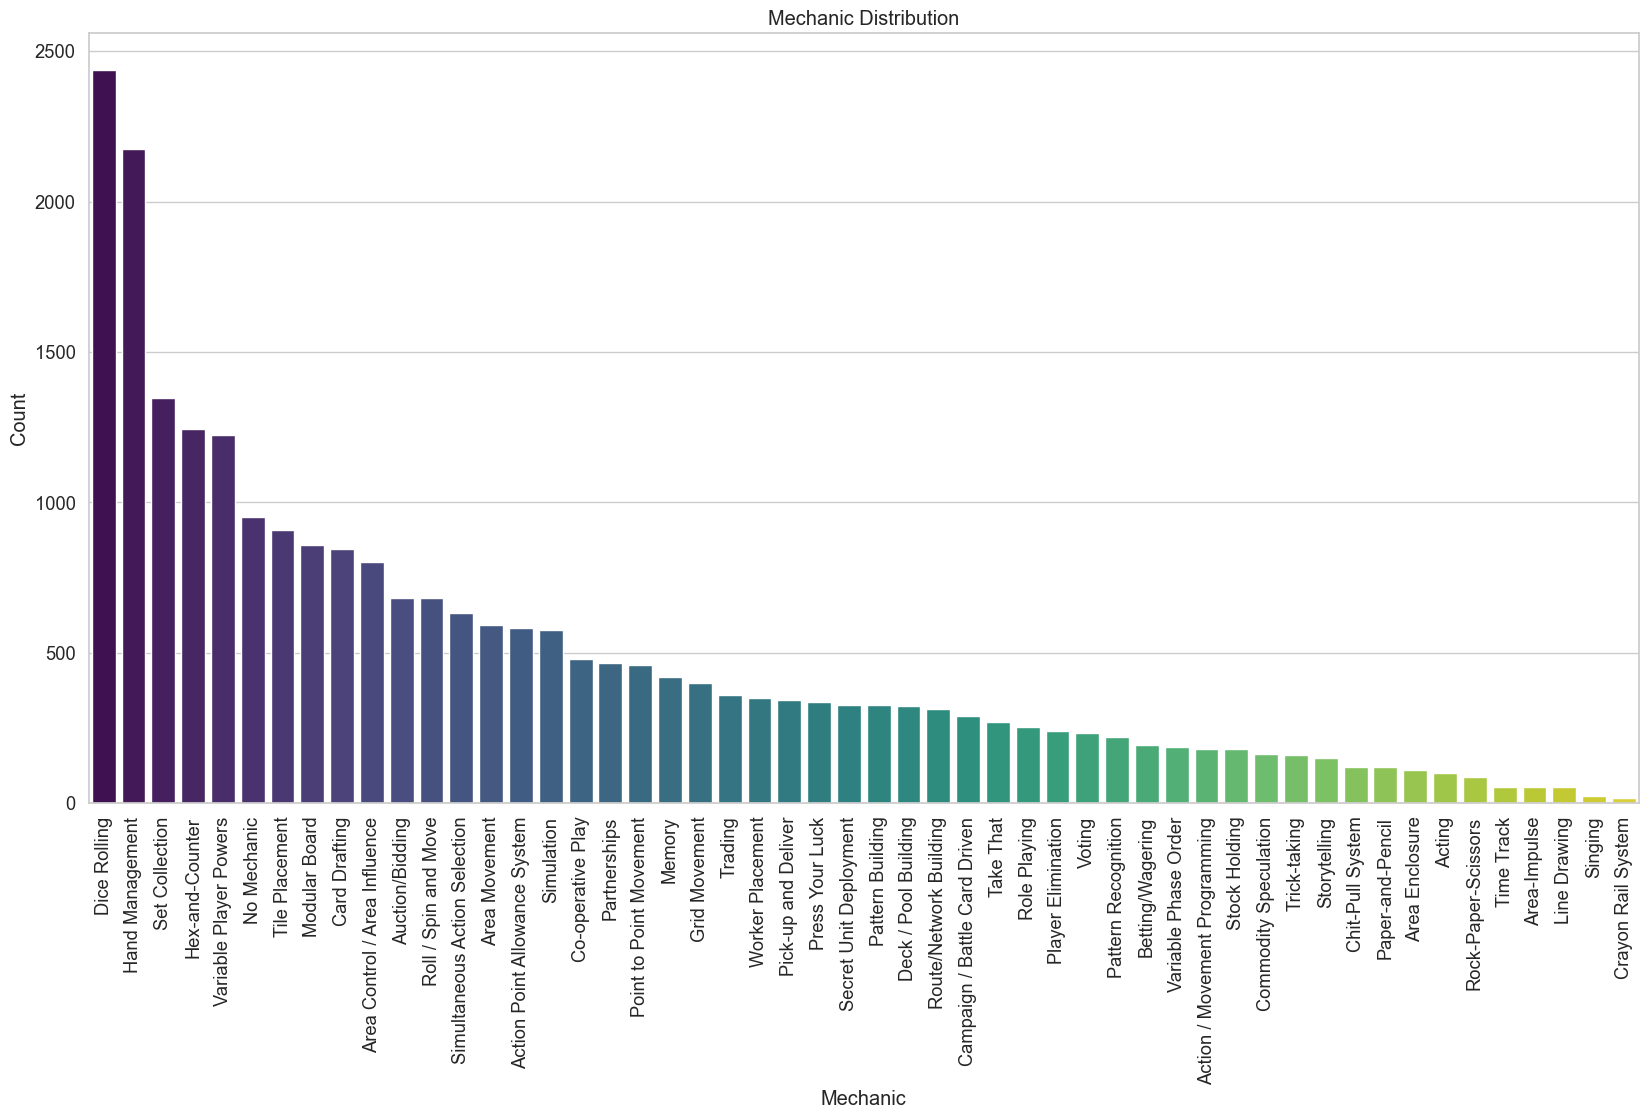

In [131]:
df_mech = df_mech.sort_values(by='Count', ascending=False)
# Configura el estilo de Seaborn
sns.set(style="whitegrid", font_scale=1.2)

# Crea un barplot utilizando Seaborn
plt.figure(figsize=(20, 10))
sns.barplot(x="Mechanic", y="Count", data=df_mech, palette="viridis")

# Añade etiquetas y título
plt.xlabel("Mechanic")
plt.ylabel("Count")
plt.title("Mechanic Distribution")
plt.xticks(rotation=90) 

# Muestra el gráfico
plt.show()

In [136]:
df_mech_5=df_mech.sort_values(by='Count', ascending=False)
df_mech_5=df_mech_5.head(5)
df_mech_5

,Mechanic,Count
2,Dice Rolling,2438
3,Hand Management,2176
7,Set Collection,1347
27,Hex-and-Counter,1244
21,Variable Player Powers,1223


<Figure size 500x500 with 0 Axes>

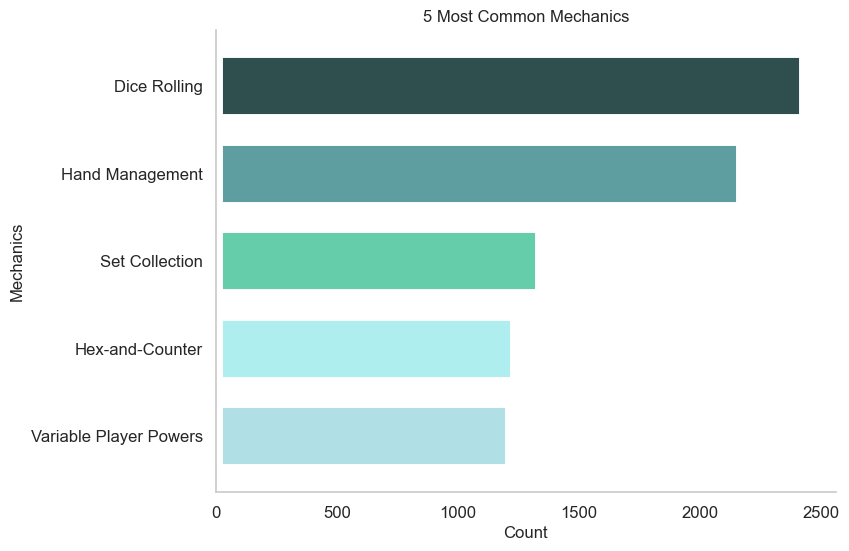

In [142]:
plt.figure(figsize=(5,5))
df_mech_5 = df_mech_5.sort_values(by = "Count", ascending = True)

fig = plt.figure(figsize=(8,6),edgecolor="black")
ax = plt.subplot()

plt.barh(df_mech_5["Mechanic"],df_mech_5["Count"],color=["powderblue","paleturquoise","mediumaquamarine","cadetblue","darkslategray"],linewidth=10)

ax.spines["top"].set(visible = False)
ax.spines["right"].set(visible = False)

plt.grid(visible=None)


plt.xlabel("Count",fontsize=12)
plt.ylabel("Mechanics", fontsize=12)
plt.title("5 Most Common Mechanics",fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12);

### Part 2

##### You must answer a “Statistically Relevant” question, OF YOUR OWN CHOOSING, using the dataset, that has not been asked in Part 1. This must have a logical basis that enhances the information and insight gained in the scenario.  

Cuales serian los 50 juegos mas relevantes que se deberian considerar para el plan de compras para la temporada de invierno?

In [143]:
top100_rated=df_games.sort_values(by="users_rated", ascending=False)
top100_rated.head(100)

,name,average_rating,category,max_playtime,min_playtime,playing_time,min_age,min_players,max_players,mechanic,users_rated,year_published,period,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,m14,m15,m16,m17,m18
12,Catan,7.3,negotiation,120,60,120,10,3,4,"Dice Rolling,Hand Management,Modular Board,Rou...",67655,1995,New,Dice Rolling,Hand Management,Modular Board,Route/Network Building,Trading,None,None,None,None,None,None,None,None,None,None,None,None,None
617,Carcassonne,7.4,"city building,medieval,territory building",45,30,45,8,2,5,"Area Control / Area Influence,Tile Placement",67056,2000,New,Area Control / Area Influence,Tile Placement,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
5368,Pandemic,7.7,medical,45,45,45,8,2,4,"Action Point Allowance System,Co-operative Pla...",62377,2008,New,Action Point Allowance System,Co-operative Play,Hand Management,Point to Point Movement,Set Collection,Trading,Variable Player Powers,None,None,None,None,None,None,None,None,None,None,None
5737,Dominion,7.7,"card game,medieval",30,30,30,13,2,4,"Card Drafting,Deck / Pool Building,Hand Manage...",55930,2008,New,Card Drafting,Deck / Pool Building,Hand Management,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
6720,7 Wonders,7.8,"ancient,card game,city building,civilization",30,30,30,10,2,7,"Card Drafting,Hand Management,Set Collection,S...",51688,2010,New,Card Drafting,Hand Management,Set Collection,Simultaneous Action Selection,Variable Player Powers,None,None,None,None,None,None,None,None,None,None,None,None,None
5411,Agricola,8.1,"animals,economic,farming",150,30,150,12,1,5,"Card Drafting,Hand Management,Variable Player ...",48261,2007,New,Card Drafting,Hand Management,Variable Player Powers,Worker Placement,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3511,Ticket to Ride,7.5,"trains,travel",60,30,60,8,2,5,"Hand Management,Route/Network Building,Set Col...",48227,2004,New,Hand Management,Route/Network Building,Set Collection,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1814,Puerto Rico,8.1,"city building,economic,farming",150,90,150,12,2,5,Variable Phase Order,47789,2002,New,Variable Phase Order,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
6079,Small World,7.4,"fantasy,fighting,territory building",80,40,80,8,2,5,"Area Control / Area Influence,Area Movement,Di...",43144,2009,New,Area Control / Area Influence,Area Movement,Dice Rolling,Variable Player Powers,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1613,Power Grid,7.9,"economic,industry / manufacturing",120,120,120,12,2,6,"Auction/Bidding,Route/Network Building",42036,2004,New,Auction/Bidding,Route/Network Building,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [144]:
df_plan = df_games[df_games["users_rated"] > 20000]
df_plan.sort_values(by="users_rated", ascending=False)

,name,average_rating,category,max_playtime,min_playtime,playing_time,min_age,min_players,max_players,mechanic,users_rated,year_published,period,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,m14,m15,m16,m17,m18
12,Catan,7.3,negotiation,120,60,120,10,3,4,"Dice Rolling,Hand Management,Modular Board,Rou...",67655,1995,New,Dice Rolling,Hand Management,Modular Board,Route/Network Building,Trading,None,None,None,None,None,None,None,None,None,None,None,None,None
617,Carcassonne,7.4,"city building,medieval,territory building",45,30,45,8,2,5,"Area Control / Area Influence,Tile Placement",67056,2000,New,Area Control / Area Influence,Tile Placement,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
5368,Pandemic,7.7,medical,45,45,45,8,2,4,"Action Point Allowance System,Co-operative Pla...",62377,2008,New,Action Point Allowance System,Co-operative Play,Hand Management,Point to Point Movement,Set Collection,Trading,Variable Player Powers,None,None,None,None,None,None,None,None,None,None,None
5737,Dominion,7.7,"card game,medieval",30,30,30,13,2,4,"Card Drafting,Deck / Pool Building,Hand Manage...",55930,2008,New,Card Drafting,Deck / Pool Building,Hand Management,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
6720,7 Wonders,7.8,"ancient,card game,city building,civilization",30,30,30,10,2,7,"Card Drafting,Hand Management,Set Collection,S...",51688,2010,New,Card Drafting,Hand Management,Set Collection,Simultaneous Action Selection,Variable Player Powers,None,None,None,None,None,None,None,None,None,None,None,None,None
5411,Agricola,8.1,"animals,economic,farming",150,30,150,12,1,5,"Card Drafting,Hand Management,Variable Player ...",48261,2007,New,Card Drafting,Hand Management,Variable Player Powers,Worker Placement,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3511,Ticket to Ride,7.5,"trains,travel",60,30,60,8,2,5,"Hand Management,Route/Network Building,Set Col...",48227,2004,New,Hand Management,Route/Network Building,Set Collection,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1814,Puerto Rico,8.1,"city building,economic,farming",150,90,150,12,2,5,Variable Phase Order,47789,2002,New,Variable Phase Order,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
6079,Small World,7.4,"fantasy,fighting,territory building",80,40,80,8,2,5,"Area Control / Area Influence,Area Movement,Di...",43144,2009,New,Area Control / Area Influence,Area Movement,Dice Rolling,Variable Player Powers,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1613,Power Grid,7.9,"economic,industry / manufacturing",120,120,120,12,2,6,"Auction/Bidding,Route/Network Building",42036,2004,New,Auction/Bidding,Route/Network Building,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [145]:
df_best_games=df_plan.sort_values(by="average_rating", ascending=False)

In [147]:
df_best_games=df_best_games.head(50)
df_best_games

,name,average_rating,category,max_playtime,min_playtime,playing_time,min_age,min_players,max_players,mechanic,users_rated,year_published,period,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,m14,m15,m16,m17,m18
3885,Twilight Struggle,8.4,"modern warfare,political,wargame",180,180,180,13,2,2,"Area Control / Area Influence,Campaign / Battl...",27008,2005,New,Area Control / Area Influence,Campaign / Battle Card Driven,Dice Rolling,Hand Management,Simultaneous Action Selection,None,None,None,None,None,None,None,None,None,None,None,None,None
7727,Terra Mystica,8.3,"civilization,economic,fantasy,territory building",150,60,150,12,2,5,"Route/Network Building,Variable Phase Order,Va...",23684,2012,New,Route/Network Building,Variable Phase Order,Variable Player Powers,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
9669,7 Wonders Duel,8.2,"ancient,card game,city building,civilization",30,30,30,10,2,2,"Card Drafting,Set Collection",20088,2015,New,Card Drafting,Set Collection,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
6991,The Castles of Burgundy,8.1,"dice,medieval,territory building",90,30,90,12,2,4,"Dice Rolling,Set Collection,Tile Placement,Var...",24876,2011,New,Dice Rolling,Set Collection,Tile Placement,Variable Phase Order,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1814,Puerto Rico,8.1,"city building,economic,farming",150,90,150,12,2,5,Variable Phase Order,47789,2002,New,Variable Phase Order,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
5411,Agricola,8.1,"animals,economic,farming",150,30,150,12,1,5,"Card Drafting,Hand Management,Variable Player ...",48261,2007,New,Card Drafting,Hand Management,Variable Player Powers,Worker Placement,None,None,None,None,None,None,None,None,None,None,None,None,None,None
6794,Eclipse,8.0,"civilization,fighting,science fiction,space ex...",200,60,200,14,2,6,"Area Control / Area Influence,Dice Rolling,Gri...",20285,2011,New,Area Control / Area Influence,Dice Rolling,Grid Movement,Modular Board,Player Elimination,Tile Placement,Variable Phase Order,Variable Player Powers,None,None,None,None,None,None,None,None,None,None
7835,Android: Netrunner,8.0,"bluffing,card game,collectible components,scie...",45,45,45,14,2,2,"Action Point Allowance System,Hand Management,...",20271,2012,New,Action Point Allowance System,Hand Management,Secret Unit Deployment,Variable Player Powers,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1613,Power Grid,7.9,"economic,industry / manufacturing",120,120,120,12,2,6,"Auction/Bidding,Route/Network Building",42036,2004,New,Auction/Bidding,Route/Network Building,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
9868,Codenames,7.9,"card game,deduction,party game,spies/secret ag...",15,15,15,14,2,8,"Memory,Partnerships,Pattern Recognition,Press ...",29622,2015,New,Memory,Partnerships,Pattern Recognition,Press Your Luck,None,None,None,None,None,None,None,None,None,None,None,None,None,None


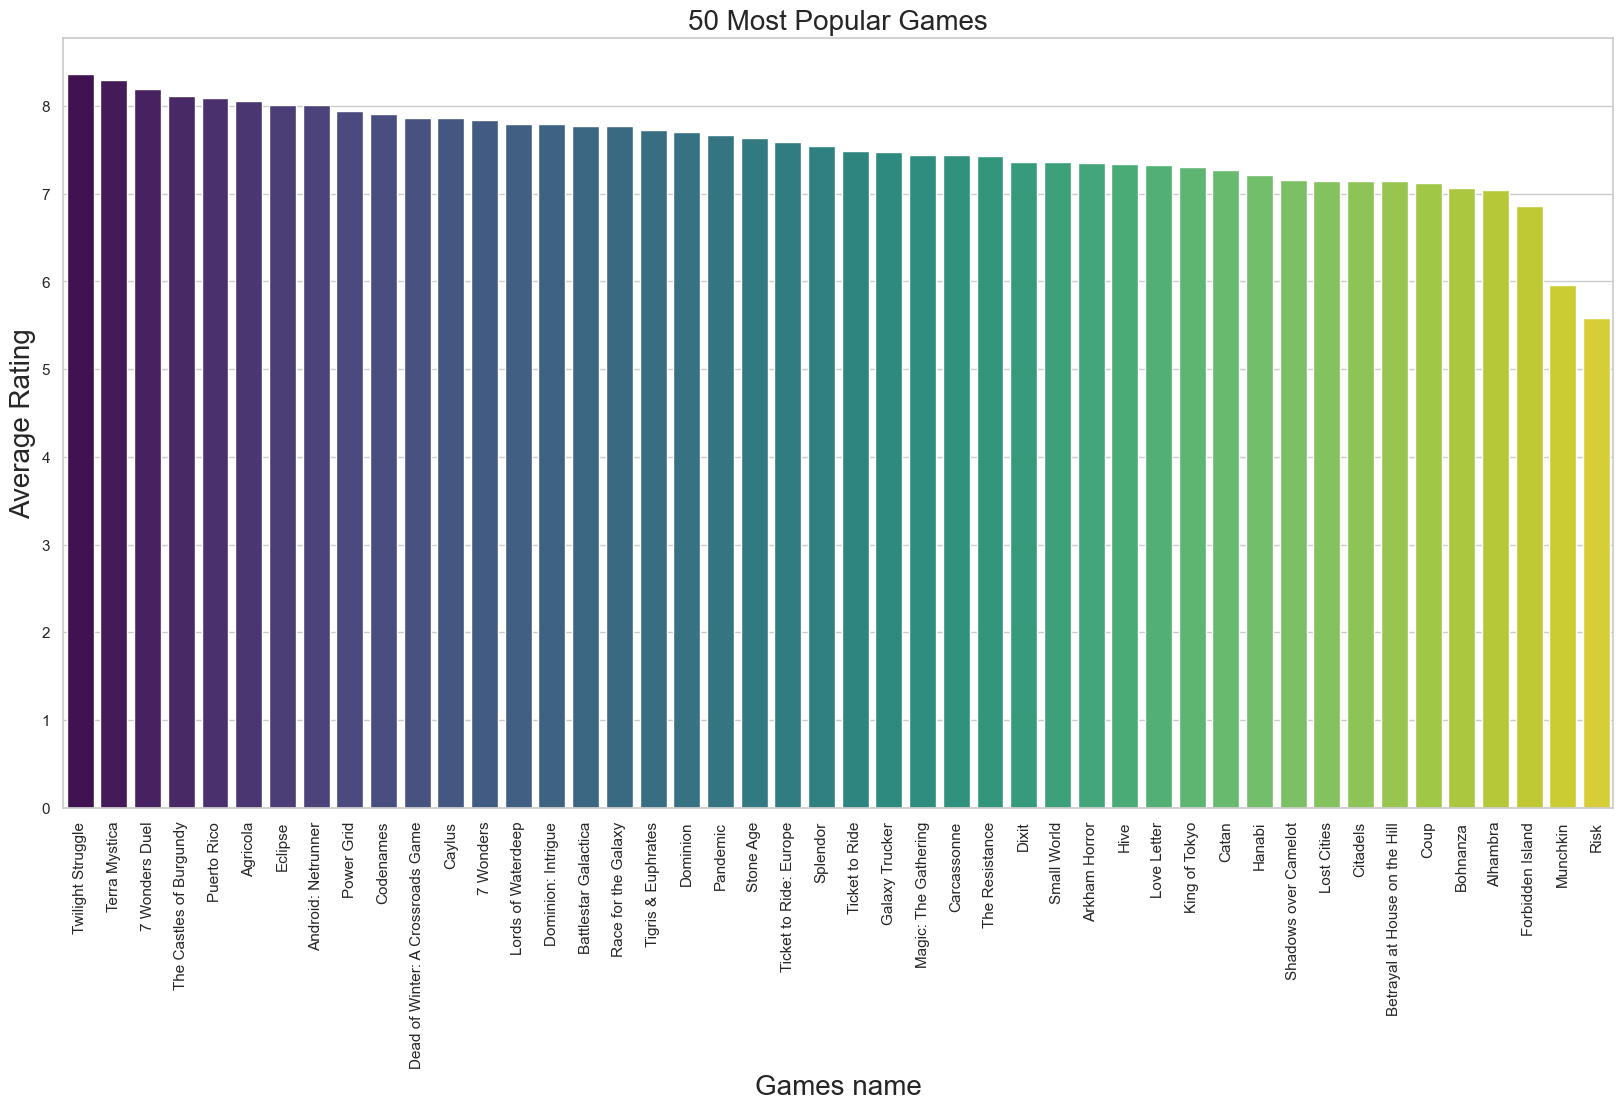

In [152]:
sns.set(style="whitegrid")

# Crea un barplot utilizando Seaborn
plt.figure(figsize=(20, 10))
sns.barplot(x="name", y="average_rating", data=df_best_games, palette="viridis")

# Añade etiquetas y título
plt.xlabel("Games name", fontsize=20)
plt.ylabel("Average Rating",fontsize=20)
plt.title("50 Most Popular Games",fontsize=20)
plt.xticks(rotation=90) ;


Also it would be important to check what games for families and friends have the better average rating, because for the winter season we need to considered Christmas, and that means the families and friend are toguether

In [153]:
df_games["Family game"] = pd.cut(df_games["min_players"], bins=[-float('inf'), 3, float('inf')], labels=['No', 'Si'])
df_games

,name,average_rating,category,max_playtime,min_playtime,playing_time,min_age,min_players,max_players,mechanic,users_rated,year_published,period,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,m14,m15,m16,m17,m18,Family game
0,Die Macher,7.7,"economic,negotiation,political",240,240,240,14,3,5,"Area Control / Area Influence,Auction/Bidding,...",4498,1986,Old,Area Control / Area Influence,Auction/Bidding,Dice Rolling,Hand Management,Simultaneous Action Selection,None,None,None,None,None,None,None,None,None,None,None,None,None,No
1,Dragonmaster,6.6,"card game,fantasy",30,30,30,12,3,4,Trick-taking,478,1981,Old,Trick-taking,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,No
2,Samurai,7.4,"abstract strategy,medieval",60,30,60,10,2,4,"Area Control / Area Influence,Hand Management,...",12019,1998,New,Area Control / Area Influence,Hand Management,Set Collection,Tile Placement,None,None,None,None,None,None,None,None,None,None,None,None,None,None,No
3,Tal der Könige,6.6,ancient,60,60,60,12,2,4,"Action Point Allowance System,Area Control / A...",314,1992,Old,Action Point Allowance System,Area Control / Area Influence,Auction/Bidding,Set Collection,None,None,None,None,None,None,None,None,None,None,None,None,None,None,No
4,Acquire,7.4,economic,90,90,90,12,3,6,"Hand Management,Stock Holding,Tile Placement",15195,1964,Old,Hand Management,Stock Holding,Tile Placement,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10527,"Silver Bayonet: The First Team in Vietnam, 196...",8.4,"vietnam war,wargame",480,30,480,12,1,2,Hex-and-Counter,75,2016,New,Hex-and-Counter,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,No
10528,Codex: Card-Time Strategy – Core Set,8.1,"card game,fantasy,fighting,video game theme",45,45,45,13,2,5,"Deck / Pool Building,Hand Management,Variable ...",82,2016,New,Deck / Pool Building,Hand Management,Variable Player Powers,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,No
10529,Wind the Film!,7.3,card game,20,20,20,12,2,4,"Hand Management,Set Collection",63,2016,New,Hand Management,Set Collection,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,No
10530,Robo Rally (2016),7.5,"miniatures,racing,science fiction",120,20,120,12,2,6,"Action / Movement Programming,Grid Movement,Mo...",341,2016,New,Action / Movement Programming,Grid Movement,Modular Board,Simultaneous Action Selection,None,None,None,None,None,None,None,None,None,None,None,None,None,None,No


In [155]:
Family_games= df_games[df_games['Family game'] == 'Si']
Family_games

,name,average_rating,category,max_playtime,min_playtime,playing_time,min_age,min_players,max_players,mechanic,users_rated,year_published,period,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,m14,m15,m16,m17,m18,Family game
65,Apples to Apples,6.0,"card game,humor,party game",30,30,30,12,4,10,"Hand Management,Simultaneous Action Selection,...",14611,1999,New,Hand Management,Simultaneous Action Selection,Voting,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Si
66,Falling,5.5,"card game,fantasy,print & play,real-time",5,5,5,8,4,8,Hand Management,1264,1998,New,Hand Management,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Si
97,Mit List und Tücke,6.6,card game,60,60,60,10,4,6,Trick-taking,204,1999,New,Trick-taking,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Si
234,Machiavelli,7.1,"bluffing,negotiation,political,renaissance,war...",480,480,480,12,4,8,"Area Movement,Player Elimination,Simultaneous ...",882,1977,Old,Area Movement,Player Elimination,Simultaneous Action Selection,Variable Player Powers,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Si
251,Koalition,6.4,"card game,negotiation,political",90,90,90,12,4,10,No Mechanic,184,1992,Old,No Mechanic,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Si
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10460,Codenames: Deep Undercover,6.9,"deduction,mature / adult,party game,spies/secr...",30,15,30,18,4,8,"Memory,Partnerships,Pattern Recognition,Press ...",765,2016,New,Memory,Partnerships,Pattern Recognition,Press Your Luck,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Si
10467,Gooseberry,6.8,"bluffing,deduction,party game",10,5,10,10,4,6,No Mechanic,50,2016,New,No Mechanic,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Si
10473,New Angeles,7.5,"bluffing,science fiction",240,120,240,14,4,6,"Area Control / Area Influence,Variable Player ...",675,2016,New,Area Control / Area Influence,Variable Player Powers,Voting,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Si
10480,Insider,7.3,"bluffing,deduction,party game",15,15,15,9,4,8,"Co-operative Play,Partnerships,Voting",462,2016,New,Co-operative Play,Partnerships,Voting,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Si


In [160]:
df_best_games_for_family=Family_games.sort_values(by="average_rating", ascending=False)
df_best_games_for_family=df_best_games_for_family.head(25)
df_best_games_for_family

,name,average_rating,category,max_playtime,min_playtime,playing_time,min_age,min_players,max_players,mechanic,users_rated,year_published,period,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,m14,m15,m16,m17,m18,Family game
10071,Mega Civilization,8.4,"ancient,civilization,economic,negotiation",720,360,720,12,5,18,"Area Movement,Set Collection,Trading",550,2015,New,Area Movement,Set Collection,Trading,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Si
9280,Ultimate Werewolf: Deluxe Edition For Kickstarter,7.9,"bluffing,card game,deduction,horror,murder/mys...",30,30,30,13,5,75,"Partnerships,Player Elimination,Role Playing,S...",59,2014,New,Partnerships,Player Elimination,Role Playing,Storytelling,Variable Player Powers,Voting,None,None,None,None,None,None,None,None,None,None,None,None,Si
8856,Telestrations: 12 Player Party Pack,7.9,party game,0,0,0,12,4,12,"Line Drawing,Paper-and-Pencil",1044,2011,New,Line Drawing,Paper-and-Pencil,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Si
9028,Monikers,7.8,"card game,humor,mature / adult,party game,prin...",60,60,60,18,4,20,"Acting,Card Drafting,Role Playing",990,2015,New,Acting,Card Drafting,Role Playing,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Si
5760,Time's Up! Title Recall!,7.8,"humor,movies / tv / radio theme,party game",60,60,60,12,4,18,"Acting,Memory,Partnerships",2166,2008,New,Acting,Memory,Partnerships,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Si
8137,Imperios Milenarios,7.8,"ancient,civilization,negotiation",150,150,150,12,4,7,"Area Control / Area Influence,Deck / Pool Buil...",68,2012,New,Area Control / Area Influence,Deck / Pool Building,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Si
5614,Death Wears White,7.7,party game,300,300,300,16,9,9,Storytelling,53,2001,New,Storytelling,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Si
9456,The Werewolves of Miller's Hollow: The Pact,7.7,"bluffing,deduction,horror,murder/mystery,party...",40,40,40,10,9,47,"Partnerships,Player Elimination,Role Playing,V...",123,2014,New,Partnerships,Player Elimination,Role Playing,Variable Player Powers,Voting,None,None,None,None,None,None,None,None,None,None,None,None,None,Si
7982,The Resistance: Avalon,7.7,"bluffing,card game,deduction,fantasy,medieval,...",30,30,30,13,5,10,"Memory,Partnerships,Simultaneous Action Select...",15896,2012,New,Memory,Partnerships,Simultaneous Action Selection,Variable Player Powers,Voting,None,None,None,None,None,None,None,None,None,None,None,None,None,Si
10144,Secret Hitler,7.6,"bluffing,card game,deduction,party game,politi...",45,45,45,13,5,10,"Partnerships,Player Elimination,Voting",3485,2016,New,Partnerships,Player Elimination,Voting,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Si


### Part 3

You must explain, in detail. 
#### Why you chose a specific method to engineer the data and how you achieved this in python (Part 1/Part 2)  

To aproach this proyect,it was defined a serie of 5 steps, called a "Data science workflow" (Luna, J.C. (2022))

This method was choosen becase it was alined with the general objective of this assigment and because it follows a logic secuence to reach our goals in an effective and organized way.
The steps were: 

* Identify business questions
* Collect and store data
* Clean and prepare data
* Analyze data
* Visualize and communicate data

As first step, was important identify the business questions, for the part 1 we have been given those but was important bring the general goal in every step, wich was helping determine the sales strategy for the company in their upcoming Winter season.

For the second part, the question choosen was directly related to looking what would be a genuily question asked for a company in the process of planning a new Sales Strategy, that is why it seen important to know what games should be buy for the retail company.

For the second step, we already have the data, so I went directly to the third step.

For cleaning and prepare the data, many Python tools were used, it started checking the size of our data set, checking duplicated and removing non relevant columns. The Na values were checked as well and some were found in the columns of category or game mechanic, in this point the NA values were filled with a new category of No Category or No Mechanic for each case.

After this, we step up in analyze and visualize the data, following the questions given.
In some of the questions create new columns was necesary and diferent functions of Python were used, as .str.split, to have a better clasification for the games and be able to analyzed the distribution. Other functions as .concat, .rename, sort_value, were used to create new data bases with the relevant information for each question.
For the visualizations the Seaborn and Matplot libraries were used, choosen different graphics and styles to enphisis and clirify the specific information of each question.


#### Why you chose your specific visualizations to illustrate each answer (Part 1/Part 2)  

#### What design decisions you made for each visualization (for example, but not only: colour, font, titles, size, text position, font size etc) (Part 1/Part 2)  

#### What your rationale is for the visualization created in Part 2 and how your question enhances the information and insight gained in the scenario (Part 2)  

### References

Luna, J.C. (2022) How to analyze data for your business in 5 steps, DataCamp. Available at: https://www.datacamp.com/blog/how-to-analyze-data-for-business (Accessed: 09 October 2023). 

HILLIER, W. (2022). A Step-by-Step Guide to the Data Analysis Process. [online] careerfoundry.com. Available at: https://careerfoundry.com/en/blog/data-analytics/the-data-analysis-process-step-by-step/.

plotly.com. (n.d.). Box Plots. [online] Available at: https://plotly.com/python/box-plots/.

‌